In [1]:
import warnings 
warnings.filterwarnings("ignore")

# imports 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import env
from scipy import stats
from sklearn.model_selection import train_test_split

## Exercises Part I

# 1) Acquire, prepare & split your data.

In [2]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

def get_iris():
    my_query="""
            SELECT *
            FROM measurements as m
            JOIN species as s
            USING (species_id)
        """
    df = pd.read_sql(my_query, get_connection('iris_db'))
    return df

In [3]:
# Acquire:

df = get_iris()
df.head().T

,0,1,2,3,4
species_id,1,1,1,1,1
measurement_id,1,2,3,4,5
sepal_length,5.1,4.9,4.7,4.6,5.0
sepal_width,3.5,3.0,3.2,3.1,3.6
petal_length,1.4,1.4,1.3,1.5,1.4
petal_width,0.2,0.2,0.2,0.2,0.2
species_name,setosa,setosa,setosa,setosa,setosa


In [4]:
# Prepare: 
def prep_iris_inline(df):
    df = df.rename(columns={'species_name': 'species'})
    df = df.drop(columns=['measurement_id', 'species_id'])
    return df

In [5]:
df = prep_iris_inline(df)

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# Split:

def train_validate_test_split(df, target, seed=12345):
    train, test = train_test_split(df, train_size=0.8, 
                                   random_state=1349, 
                                   stratify=df.species)
    
    train, validate = train_test_split(train, train_size=0.7, 
                                       random_state=1349, 
                                       stratify=train.species)

    return train, validate, test

In [10]:
# Stratify with categorical target variables
train, validate, test = train_validate_test_split(df, target='species')
train.shape, validate.shape, test.shape




((84, 5), (36, 5), (30, 5))

# 2) Univariate Stats

    - For each measurement type (quantitative variable): 
        create a histogram, boxplot, & compute descriptive 
        statistics (using .describe()).

    - For each species (categorical variable): create a frequency 
        table and a bar plot of those frequencies.

    - Document takeaways & any actions.

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 138 to 54
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [12]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
138,6.0,3.0,4.8,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa
79,5.7,2.6,3.5,1.0,versicolor
74,6.4,2.9,4.3,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor


In [13]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,84.000000,84.000000,84.000000,84.000000
mean,5.847619,3.053571,3.738095,1.208333
std,0.841324,0.417233,1.765459,0.775717
min,4.300000,2.000000,1.000000,0.100000
25%,5.075000,2.800000,1.600000,0.375000
50%,5.900000,3.000000,4.300000,1.300000
75%,6.425000,3.300000,5.100000,1.800000
max,7.700000,4.400000,6.900000,2.500000


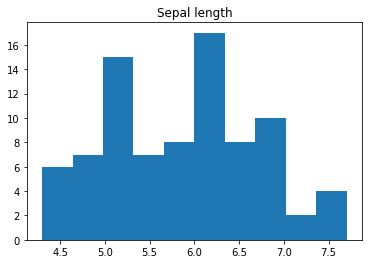

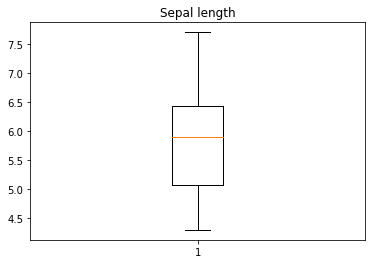

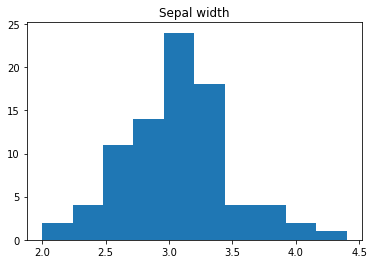

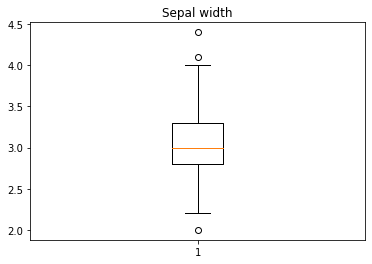

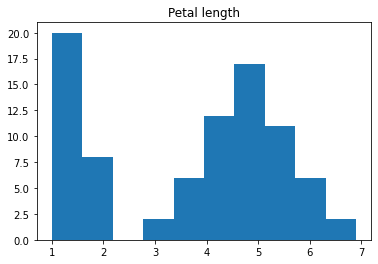

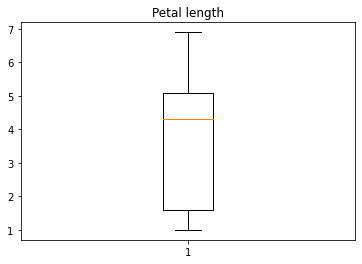

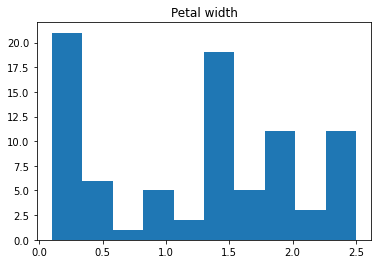

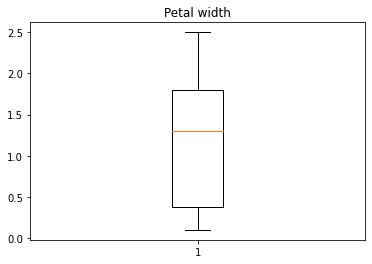

In [14]:
# Plot numeric columns
# define num_cols by datatype of float64
num_cols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in num_cols:
    #use matplotlib to create a histogram
    #alt formatting: calling train[col].hist()
    plt.hist(train[col])
    # make a title, cleaned up a little with string methods
    plt.title(col.replace('_',' ').capitalize())
    #call plt.show so we have separate visualizations
    plt.show()
    # use matplotlib to create a boxplot
    plt.boxplot(train[col])
    # use the same string methods to clean up the title
    plt.title(col.replace('_',' ').capitalize())
    plt.savefig(col + 'box.png')
    plt.show()


In [15]:
train.species.value_counts()

virginica     28
setosa        28
versicolor    28
Name: species, dtype: int64

(array([28.,  0.,  0.,  0.,  0., 28.,  0.,  0.,  0., 28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

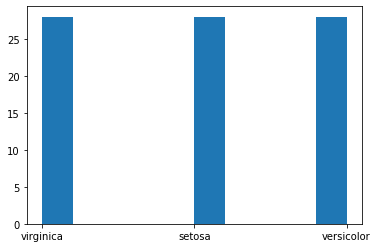

In [16]:
plt.hist(train.species)

# 3) Bivariate Stats

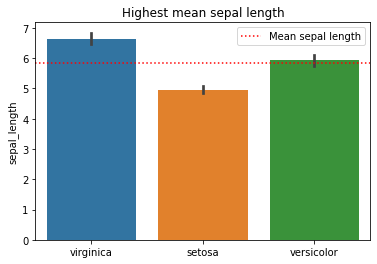

In [40]:
plt.title("Highest mean sepal length")
sns.barplot(x="species", y="sepal_length", data=train)
mean_sepal_length = train.sepal_length.mean()
plt.axhline(mean_sepal_length, label="Mean sepal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

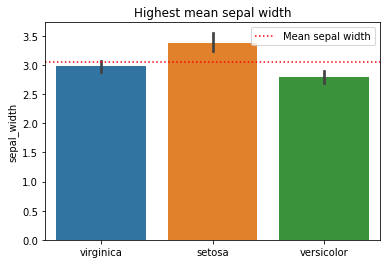

In [18]:
plt.title("Highest mean sepal width")
sns.barplot(x="species", y="sepal_width", data=train)
mean_sepal_width = train.sepal_width.mean()
plt.axhline(mean_sepal_width, label="Mean sepal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

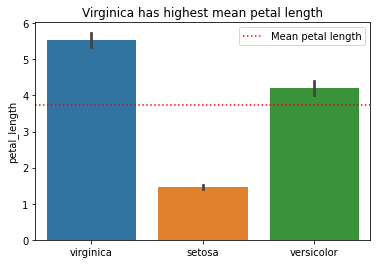

In [19]:
plt.title("Virginica has highest mean petal length")
sns.barplot(x="species", y="petal_length", data=train)
mean_petal_length = train.petal_length.mean()
plt.axhline(mean_petal_length, label="Mean petal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()


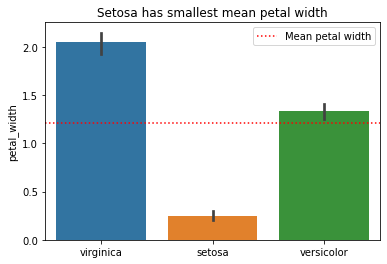

In [20]:
plt.title("Setosa has smallest mean petal width")
sns.barplot(x="species", y="petal_width", data=train)
mean_petal_width = train.petal_width.mean()
plt.axhline(mean_petal_width, label="Mean petal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

In [21]:
train[train.species == 'virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,6.650000,2.975000,5.539286,2.046429
std,0.532986,0.260519,0.525173,0.294998
min,5.800000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.600000,3.000000,5.550000,2.050000
75%,6.900000,3.200000,5.825000,2.300000
max,7.700000,3.400000,6.900000,2.500000


In [22]:
train[train.species == 'setosa'].describe()


,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,4.957143,3.385714,1.457143,0.246429
std,0.362531,0.433516,0.185450,0.129048
min,4.300000,2.300000,1.000000,0.100000
25%,4.775000,3.100000,1.400000,0.200000
50%,5.000000,3.350000,1.500000,0.200000
75%,5.100000,3.625000,1.600000,0.325000
max,5.800000,4.400000,1.900000,0.600000


In [23]:
train[train.species == 'versicolor'].describe()


,sepal_length,sepal_width,petal_length,petal_width
count,28.000000,28.000000,28.000000,28.000000
mean,5.935714,2.800000,4.217857,1.332143
std,0.512231,0.303071,0.522142,0.205577
min,5.000000,2.000000,3.000000,1.000000
25%,5.600000,2.700000,3.900000,1.275000
50%,6.000000,2.900000,4.300000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,6.900000,3.400000,5.100000,1.700000


In [41]:

virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']
setosa = train[train.species == 'setosa']

t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, 
                          alternative="greater")
t, p

(768.5, 2.982389808696449e-10)

In [25]:
test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
652.0 1.0119920315840621e-05
------------------


Comparing sepal_width between virginica and versicolor
534.0 0.009508012794926874
------------------


Comparing petal_length between virginica and versicolor
771.5 2.5253450566492905e-10
------------------


Comparing petal_width between virginica and versicolor
768.5 2.982389808696449e-10
------------------




# 4) Multivariate Stats

In [26]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']


In [27]:
train.head()


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
138,6.0,3.0,4.8,1.8,virginica,18.00,8.64
7,5.0,3.4,1.5,0.2,setosa,17.00,0.30
79,5.7,2.6,3.5,1.0,versicolor,14.82,3.50
74,6.4,2.9,4.3,1.3,versicolor,18.56,5.59
97,6.2,2.9,4.3,1.3,versicolor,17.98,5.59


In [28]:
import itertools

In [29]:
list(itertools.combinations(train.drop(columns='species').columns, 2))


[('sepal_length', 'sepal_width'),
 ('sepal_length', 'petal_length'),
 ('sepal_length', 'petal_width'),
 ('sepal_length', 'sepal_area'),
 ('sepal_length', 'petal_area'),
 ('sepal_width', 'petal_length'),
 ('sepal_width', 'petal_width'),
 ('sepal_width', 'sepal_area'),
 ('sepal_width', 'petal_area'),
 ('petal_length', 'petal_width'),
 ('petal_length', 'sepal_area'),
 ('petal_length', 'petal_area'),
 ('petal_width', 'sepal_area'),
 ('petal_width', 'petal_area'),
 ('sepal_area', 'petal_area')]

In [30]:
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]

In [31]:
combos[0]


('sepal_length', 'sepal_width')

In [32]:
train.groupby('species')['sepal_area'].sum()


species
setosa        473.12
versicolor    467.81
virginica     554.13
Name: sepal_area, dtype: float64

In [33]:
x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

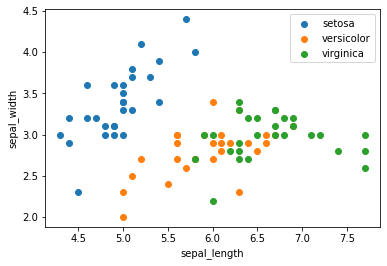

In [34]:
# test plot
scatter_species(x,y)


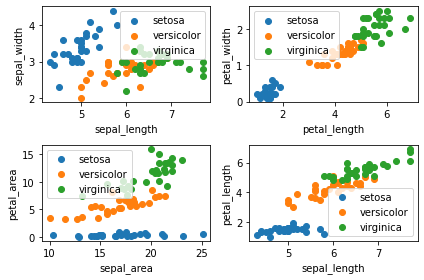

In [35]:
plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])
plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])
plt.tight_layout()


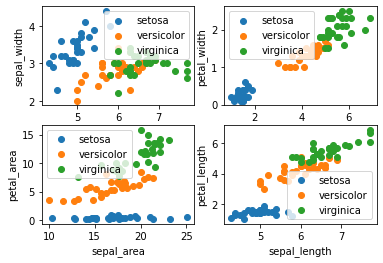

In [36]:
for i, pair in enumerate(combos):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0], pair[1])


## Exercises Part II

In [37]:
Explore your titanic dataset more completely.

    -Determine drivers of the target variable
    -Determine if certain columns should be dropped
    -Determine if it would be valuable to bin some numeric columns
    -Determine if it would be valuable to combine multiple columns into one.

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

SyntaxError: invalid syntax (2672816103.py, line 1)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from acquire import get_titanic_data
from prepare import split_titanic_data

# grabbing data
df = get_titanic_data()
# remove the deck column
df = df.drop(columns='deck')

In [ ]:
df[~ df.age.isna()].shape

In [ ]:
df.shape

In [ ]:
df.head().T

In [ ]:
# dataframe where the age is not null
df = df[~ df.age.isna()]
# dataframe where the embark is not null
df = df[~ df.embarked.isna()]
# drop out passenger id. was alread droped in data
df = df.drop(columns=['passenger_id'])
# data split
train, validate, test = split_titanic_data(df)

In [ ]:
df.head().T

## Exercises Part III

In [ ]:
    -Explore your telco data to discover drivers of churn
    -Determine if certain columns should be dropped
    -Determine if it would be valuable to bin some numeric columns
    -Determine if it would be valuable to combine multiple columns into one.

What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.